<a href="https://colab.research.google.com/github/Badsha9ip/Badsha9ip/blob/main/spotify_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spotify_history.csv')
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


# Task
Analyze the user's music listening history from the file "streaming_history.json" to understand their listening habits, including most listened tracks and artists, listening time distribution, and how habits change over time.

## Data cleaning

### Subtask:
Handle missing values in `reason_start` and `reason_end` columns.


**Reasoning**:
Fill the missing values in the 'reason_start' and 'reason_end' columns with 'unknown'.



In [4]:
df['reason_start'] = df['reason_start'].fillna('unknown')
df['reason_end'] = df['reason_end'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149860 non-null  object
 8   reason_end         149860 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


## Feature engineering

### Subtask:
Convert `ts` column to datetime objects and extract relevant time features like hour, day of the week, month, and year.


**Reasoning**:
Convert the 'ts' column to datetime objects and extract the hour, day of the week, month, and year into new columns as requested. Then display the first few rows and the data types of the new columns.



In [5]:
df['ts'] = pd.to_datetime(df['ts'])
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()
df['year'] = df['ts'].dt.year
display(df.head())
display(df[['hour', 'day_of_week', 'month', 'year']].info())

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour,day_of_week,month,year
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,Monday,July,2013
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,Monday,July,2013
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,Monday,July,2013
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,Monday,July,2013
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,3,Monday,July,2013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   hour         149860 non-null  int32 
 1   day_of_week  149860 non-null  object
 2   month        149860 non-null  object
 3   year         149860 non-null  int32 
dtypes: int32(2), object(2)
memory usage: 3.4+ MB


None

## Analyze listening time

### Subtask:
Calculate total listening time and visualize listening time distribution.


**Reasoning**:
Calculate the total listening time, print it, and create a histogram and a box plot to visualize the distribution of milliseconds played.



Total listening time: 5341.54 hours


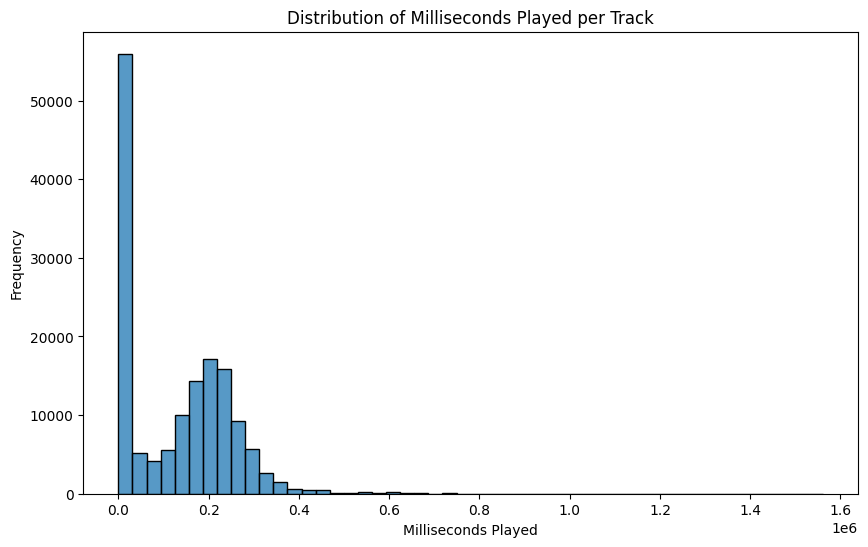

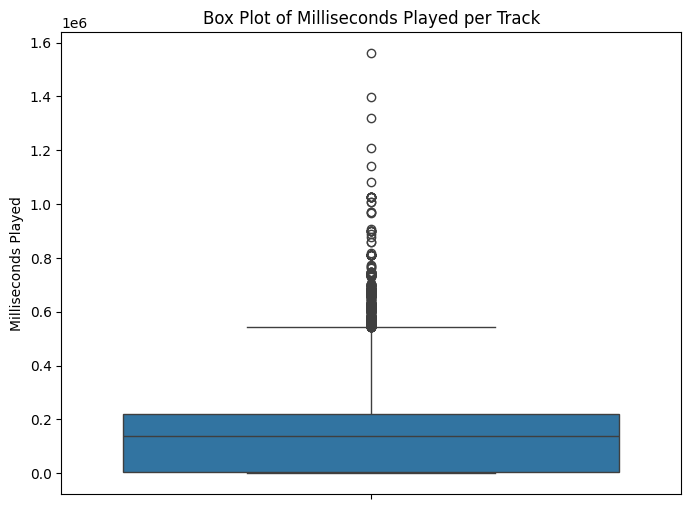

In [6]:
total_listening_time_hours = df['ms_played'].sum() / (1000 * 60 * 60)
print(f'Total listening time: {total_listening_time_hours:.2f} hours')

plt.figure(figsize=(10, 6))
sns.histplot(df['ms_played'], bins=50, kde=False)
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.title('Distribution of Milliseconds Played per Track')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ms_played'])
plt.ylabel('Milliseconds Played')
plt.title('Box Plot of Milliseconds Played per Track')
plt.show()

## Analyze most listened tracks and artists

### Subtask:
Identify and visualize the most frequently played tracks and artists.


**Reasoning**:
Count the occurrences of tracks and artists, then create bar charts to visualize the top 10 most frequent ones.



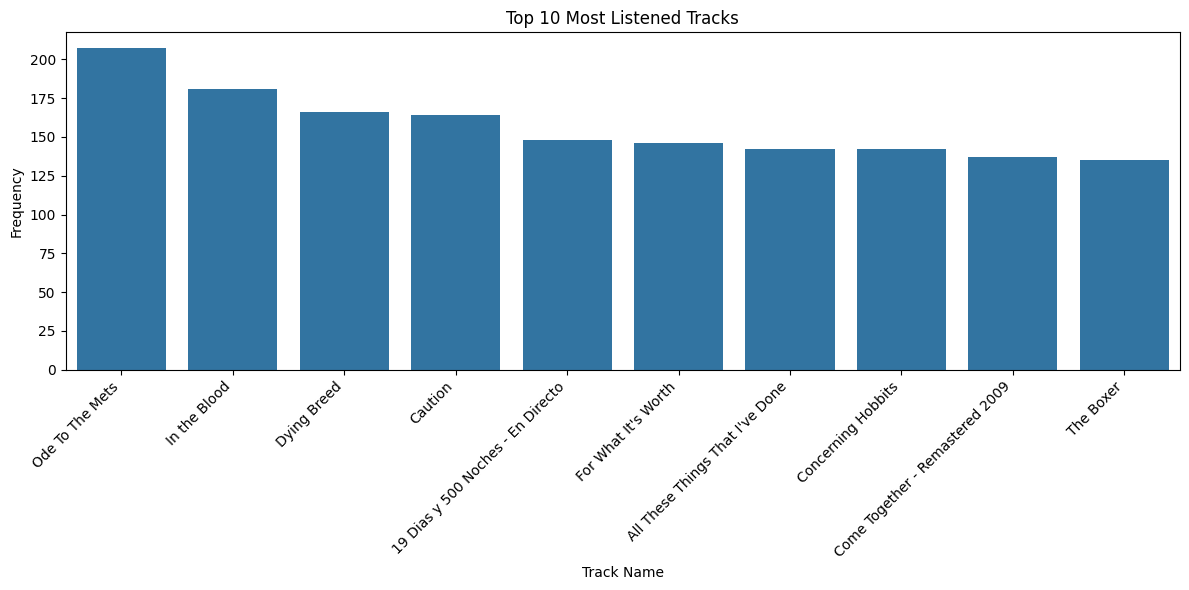

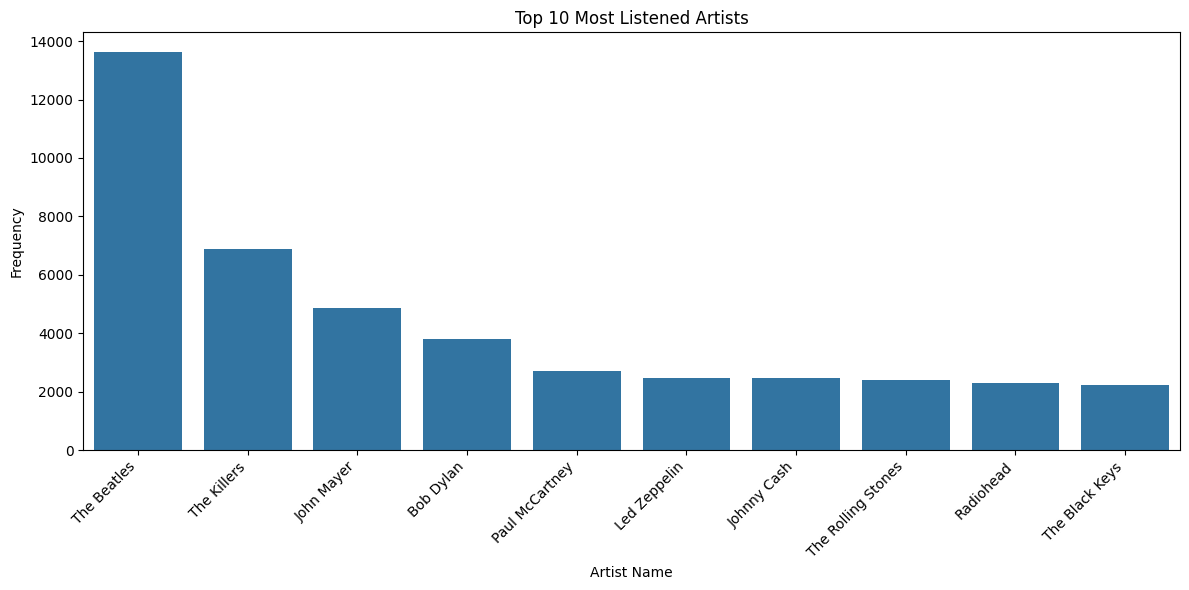

In [7]:
top_10_tracks = df['track_name'].value_counts().nlargest(10)
top_10_artists = df['artist_name'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_tracks.index, y=top_10_tracks.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Track Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Listened Tracks')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_artists.index, y=top_10_artists.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Listened Artists')
plt.tight_layout()
plt.show()

## Analyze listening habits over time

### Subtask:
Analyze how listening habits change over different time periods (e.g., by hour of the day, day of the week, month, year).


**Reasoning**:
Group the data by hour, day of week, month, and year and calculate the counts for each. Then create bar plots to visualize the listening habits over these time periods.



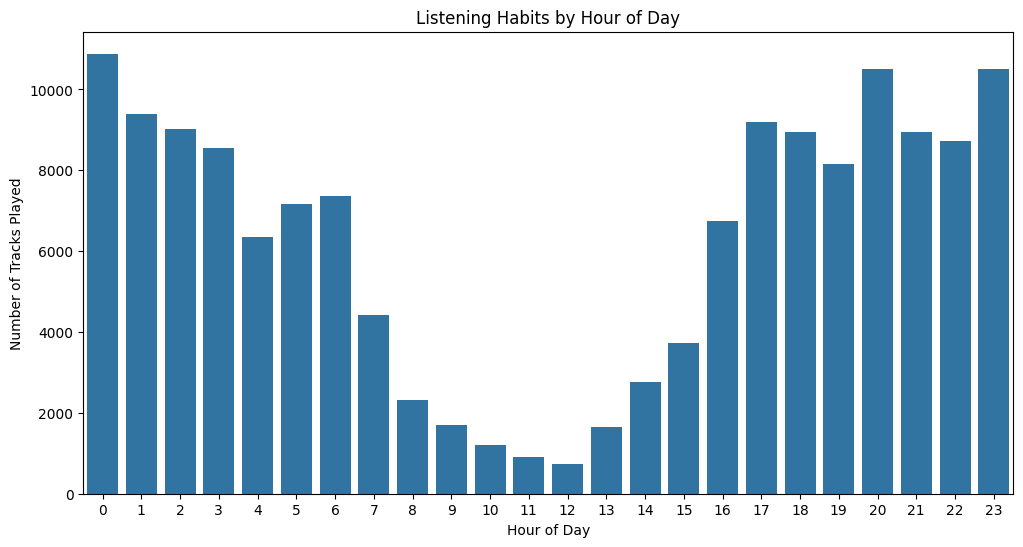

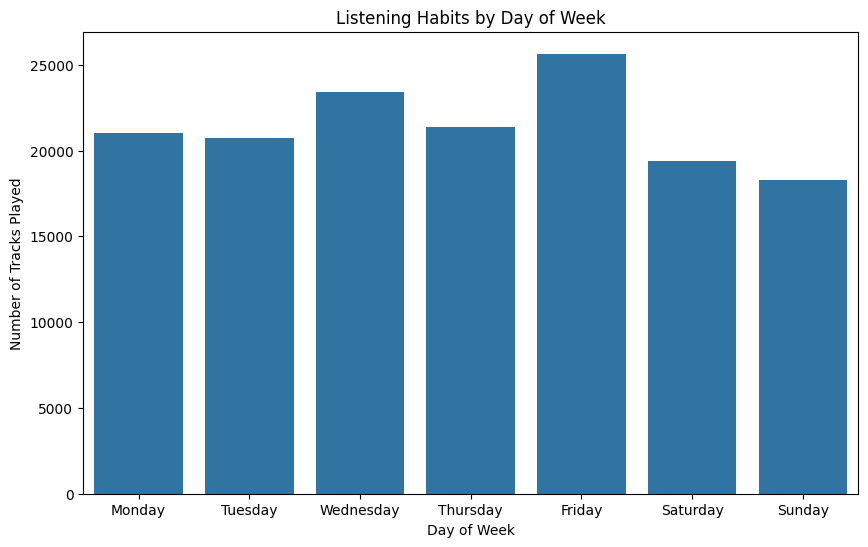

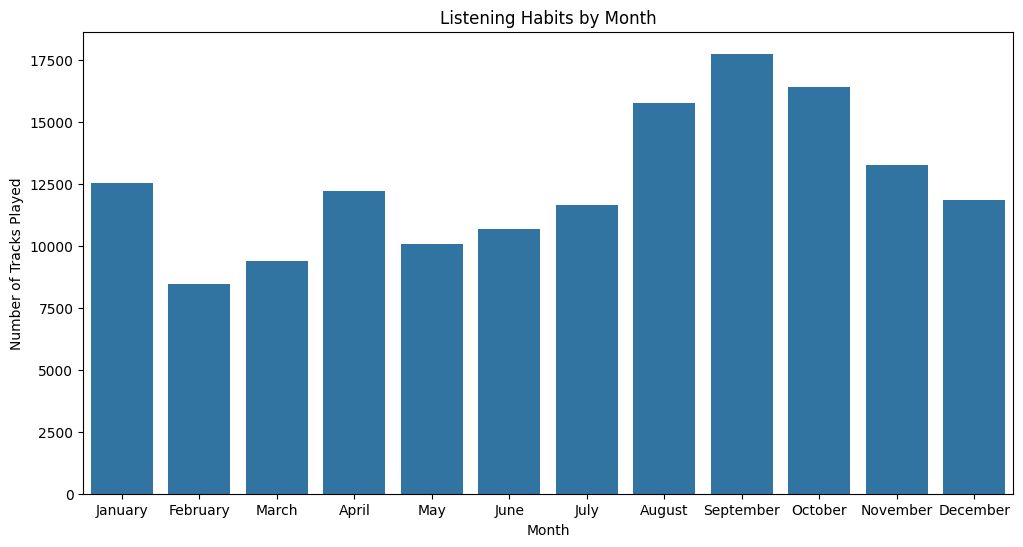

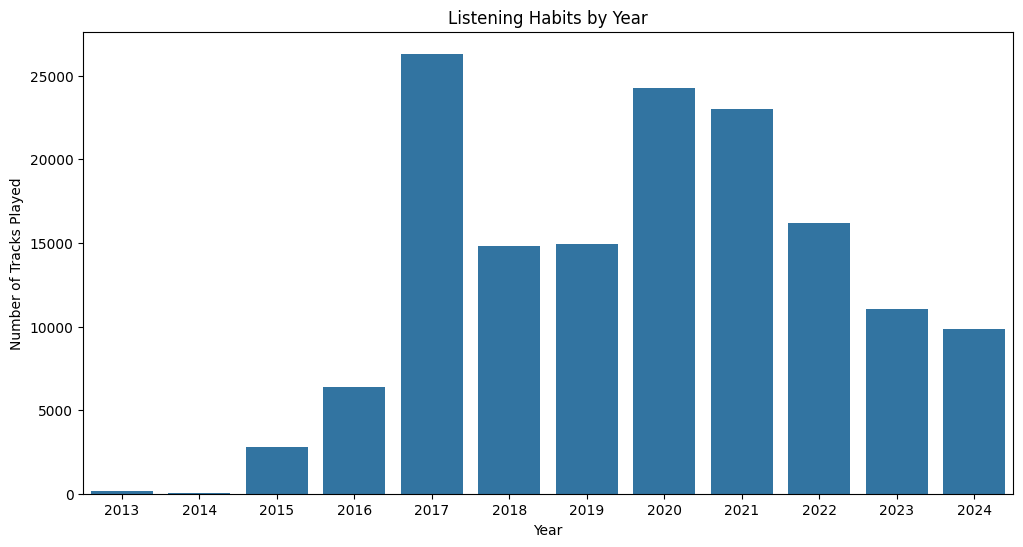

In [8]:
listening_by_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=listening_by_hour.index, y=listening_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Hour of Day')
plt.show()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
listening_by_day = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=listening_by_day.index, y=listening_by_day.values, order=day_order)
plt.xlabel('Day of Week')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Day of Week')
plt.show()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
listening_by_month = df['month'].value_counts().reindex(month_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=listening_by_month.index, y=listening_by_month.values, order=month_order)
plt.xlabel('Month')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Month')
plt.show()

listening_by_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=listening_by_year.index, y=listening_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Year')
plt.show()

## Analyze skipping and shuffle behavior

### Subtask:
Investigate the relationship between skipping, shuffle, and other factors.


**Reasoning**:
Calculate the overall skipping proportion and the skipping proportion for shuffle on and off, then create a bar plot to visualize the skipping proportion for shuffle on and off.



Overall proportion of skipped tracks: 0.05
Proportion of skipped tracks by shuffle:
shuffle
False    0.043237
True     0.055689
Name: skipped, dtype: float64


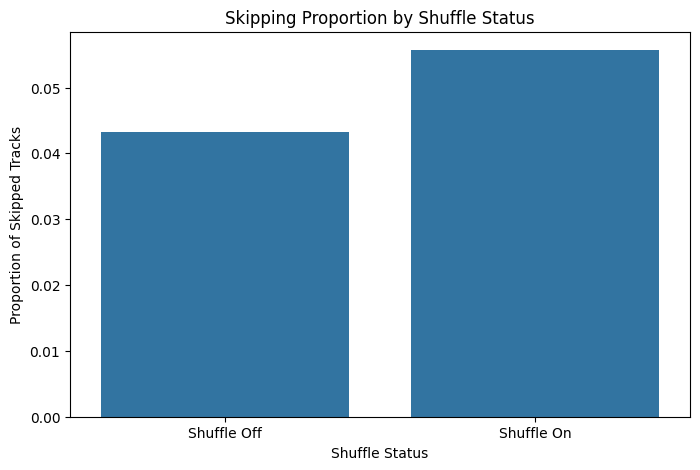

In [9]:
overall_skipped_proportion = df['skipped'].mean()
print(f'Overall proportion of skipped tracks: {overall_skipped_proportion:.2f}')

skipped_by_shuffle = df.groupby('shuffle')['skipped'].mean()
print('Proportion of skipped tracks by shuffle:')
print(skipped_by_shuffle)

plt.figure(figsize=(8, 5))
sns.barplot(x=skipped_by_shuffle.index, y=skipped_by_shuffle.values)
plt.xticks([0, 1], ['Shuffle Off', 'Shuffle On'])
plt.xlabel('Shuffle Status')
plt.ylabel('Proportion of Skipped Tracks')
plt.title('Skipping Proportion by Shuffle Status')
plt.show()

**Reasoning**:
Investigate the relationship between `reason_end` and skipping by calculating the proportion of skipped tracks for each `reason_end` category and create a bar plot to visualize the skipping proportion for each `reason_end` category.



Proportion of skipped tracks by reason_end:
reason_end
appload                         1.000000
popup                           1.000000
unknown                         0.332468
endplay                         0.198636
clickrow                        0.117647
backbtn                         0.110449
fwdbtn                          0.101945
trackdone                       0.000285
logout                          0.000000
nextbtn                         0.000000
reload                          0.000000
remote                          0.000000
trackerror                      0.000000
unexpected-exit                 0.000000
unexpected-exit-while-paused    0.000000
Name: skipped, dtype: float64


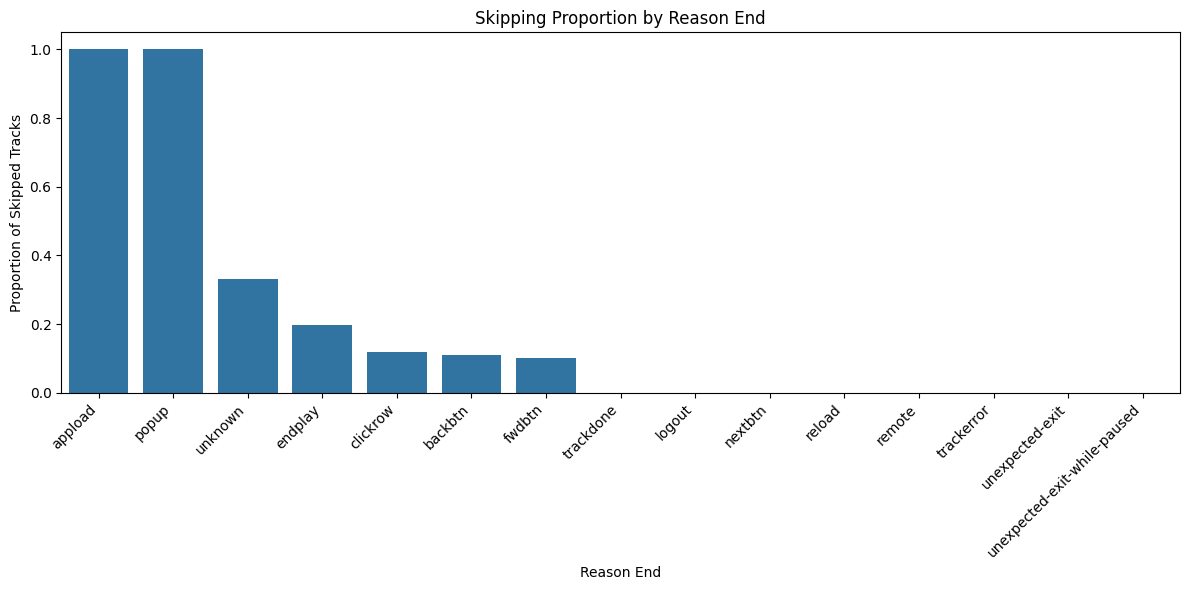

In [10]:
skipped_by_reason_end = df.groupby('reason_end')['skipped'].mean().sort_values(ascending=False)
print('Proportion of skipped tracks by reason_end:')
print(skipped_by_reason_end)

plt.figure(figsize=(12, 6))
sns.barplot(x=skipped_by_reason_end.index, y=skipped_by_reason_end.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reason End')
plt.ylabel('Proportion of Skipped Tracks')
plt.title('Skipping Proportion by Reason End')
plt.tight_layout()
plt.show()

## Analyze platform usage

### Subtask:
Examine which platforms are used most often for listening.


**Reasoning**:
Count the occurrences of each unique value in the 'platform' column and store the counts. Then create a bar plot to visualize the platform distribution.



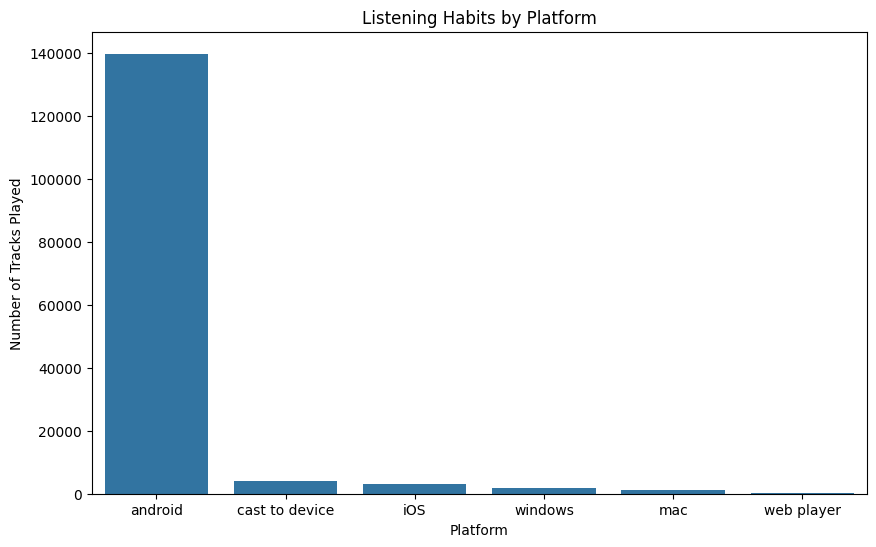

In [11]:
platform_counts = df['platform'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.xlabel('Platform')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Habits by Platform')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total listening time recorded in the dataset is approximately 5341.54 hours.
*   The distribution of milliseconds played per track is heavily skewed, with a large concentration of tracks played for very short durations and a significant number of tracks played for longer periods (outliers).
*   The overall proportion of skipped tracks is 0.05 (5%).
*   The proportion of skipped tracks is slightly higher when shuffle is on (0.056) compared to when it is off (0.043).
*   The skipping proportion varies significantly based on the reason for the track ending. Reasons like 'appload' and 'popup' show a 100% skipping rate, while reasons like 'trackdone' and 'nextbtn' show a 0% skipping rate.
*   The analysis of listening habits over time shows distributions by hour of the day, day of the week, month, and year, indicating potential peaks and lows in listening activity during different periods.
*   The analysis of platform usage shows the frequency of listening on different platforms, highlighting which platforms are used most often.

### Insights or Next Steps

*   Investigate the reasons for high skipping rates associated with specific `reason_end` categories like 'appload' and 'popup' to understand potential user friction points.
*   Further analyze the temporal listening patterns to identify specific times or periods with the highest and lowest listening activity, which could inform personalized recommendations or feature development.
